In [45]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation
from matplotlib.animation import FuncAnimation
%matplotlib notebook

In [46]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

<IPython.core.display.Javascript object>


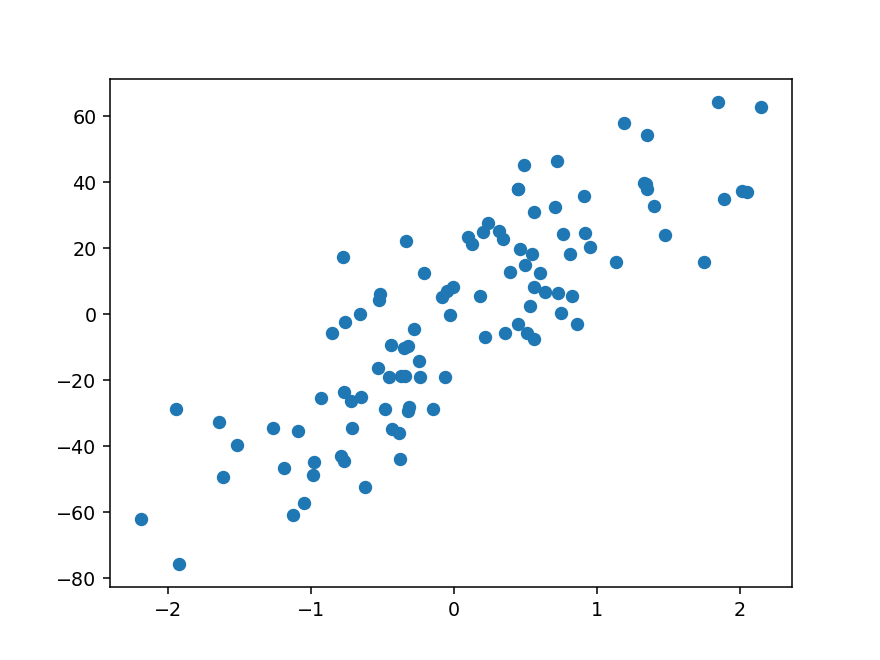

In [47]:
plt.scatter(X.reshape(100),y)

In [48]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [49]:
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [50]:
m_range = np.linspace(-80,135,100)

In [51]:
loss = []

for i in range(m_range.shape[0]):
    total = 0
    for j in range(X.shape[0]):
        current = (y[j] - m_range[i]*X[j] + 2.29)**2
        total = total + current
    curr_loss = total/X.shape[0]
    loss.append(curr_loss[0])   

In [52]:
def batch_gd():
    m_arr = []
    loss_arr = []
    lr = 0.1
    epochs = 50
    m = -100
    
    for i in range(epochs):
        m_der = (-2/X.shape[0]) * np.sum((y - m*X.ravel() + 2.29)*X.ravel())
        m = m - lr*m_der
        m_arr.append(m)
        # calculate loss for new m
        total = 0
        for j in range(X.shape[0]):
            current = (y[j] - m*X[j] + 2.29)**2
            total = total + current
        loss_arr.append(total[0]/X.shape[0])
        
    return m_arr,loss_arr
    

In [53]:
m_arr,loss_arr = batch_gd()

<IPython.core.display.Javascript object>


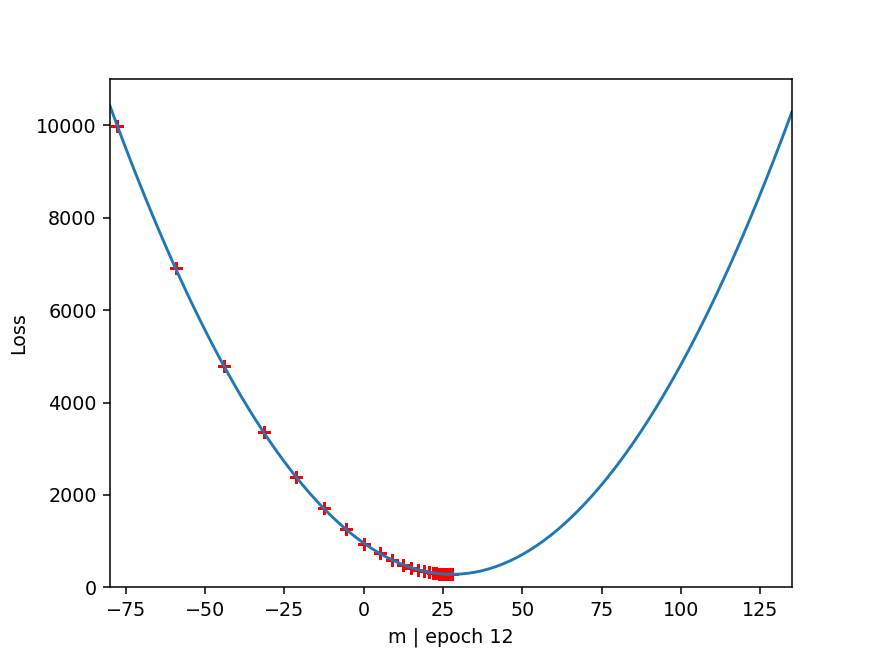

In [54]:
# Animation

fig, ax = plt.subplots()
ax.plot(m_range, loss)
x1, y1 = [],[]
sc = ax.scatter(x1,y1,color='red',marker='+')
plt.xlim(-80,135)
plt.ylim(0,11000)
plt.ylabel('Loss')

def animate(i):
    label = 'm | epoch {0}'.format(i + 1)
    x1.append(m_arr[i])
    y1.append(loss_arr[i])
    sc.set_offsets(np.c_[x1,y1])
    ax.set_xlabel(label)

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=50, interval=500) 
plt.show()

f = r"bgd_2d_loss_vs_m.gif" 
writergif = matplotlib.animation.PillowWriter(fps=2) 
ani.save(f, writer=writergif)

<IPython.core.display.Javascript object>


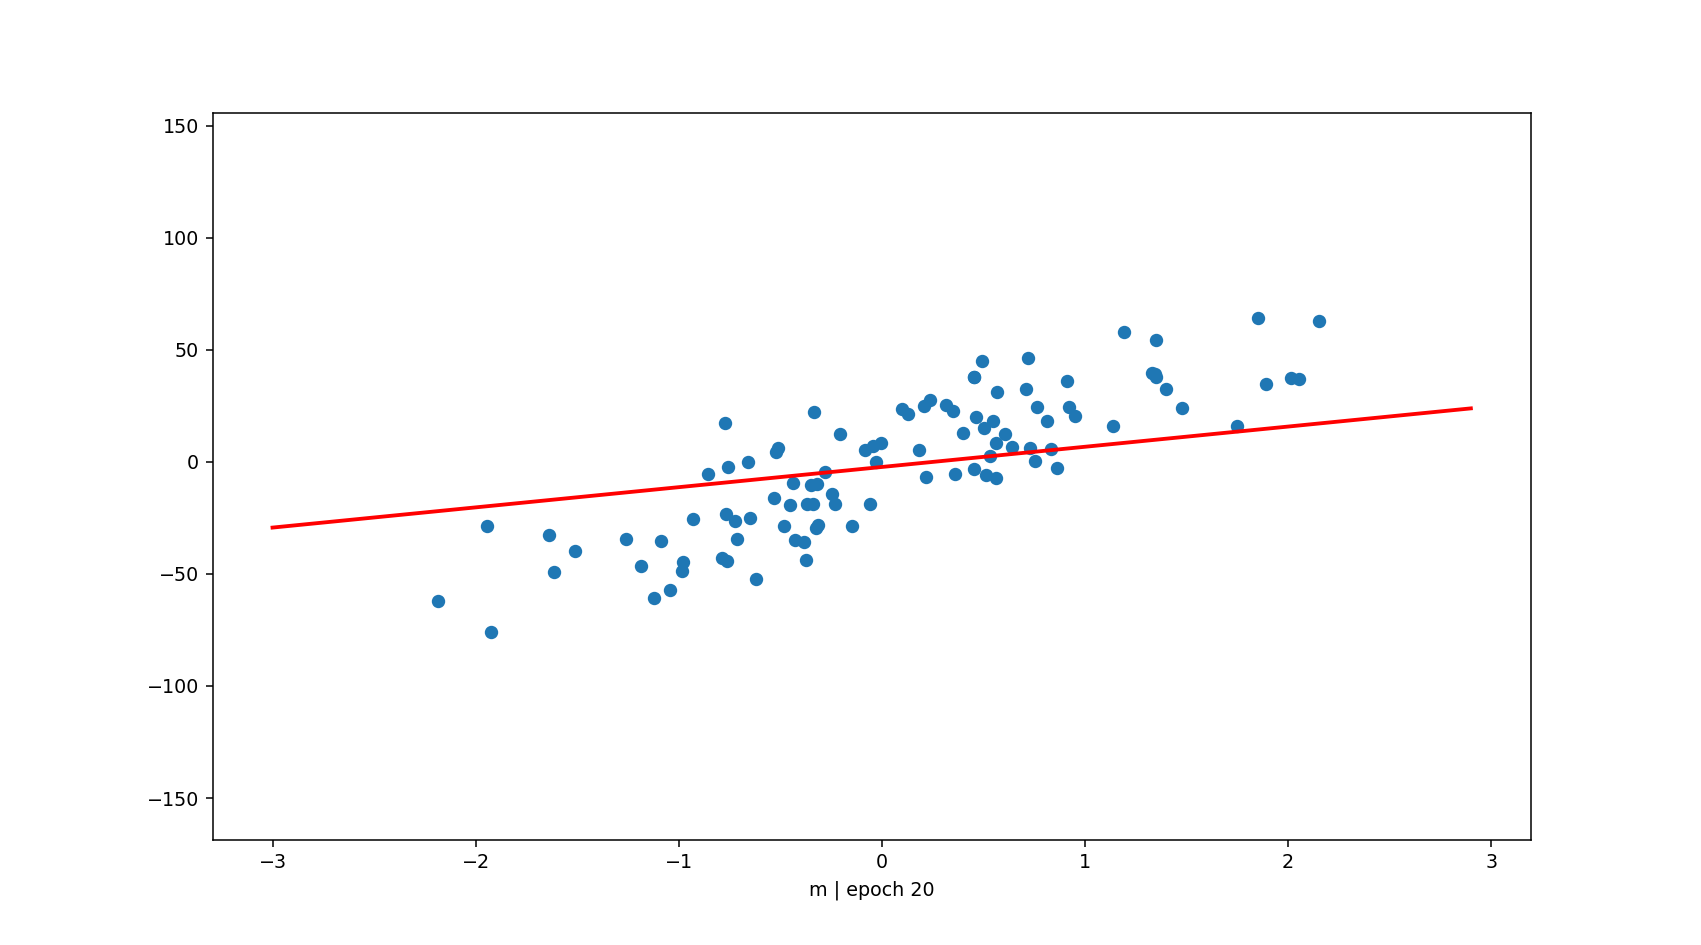

In [56]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m_arr[i] - 2.29)
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, frames=50, interval=500)

f = r"bgd_line_plot.gif" 
writergif = matplotlib.animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)